## **<center>Create SQL Database</center>**

## **Business Understanding**

### **Data Understanding**

In [28]:
# import necessary libraries
import geopandas as gpd
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Shapefile path
shapefile_path = 'Shapefiles/constituencies/constituencies.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# View the geodataframe
gdf.head()

,OBJECTID,COUNTY_NAM,CONST_CODE,CONSTITUEN,COUNTY_ASS,COUNTY_A_1,REGIST_CEN,REGISTRATI,COUNTY_COD,Shape_Leng,Shape_Area,geometry
0,1,NAIROBI,288.0,KAMUKUNJI,0.0,NaN,0.0,NaN,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,2,NAIROBI,274.0,WESTLANDS,0.0,NaN,0.0,NaN,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,3,NAIROBI,275.0,DAGORETTI NORTH,0.0,NaN,0.0,NaN,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,4,NAIROBI,279.0,ROYSAMBU,0.0,NaN,0.0,NaN,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,5,NAIROBI,289.0,STAREHE,0.0,NaN,0.0,NaN,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [3]:
# view dataframe info
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    295 non-null    int64   
 1   COUNTY_NAM  290 non-null    object  
 2   CONST_CODE  295 non-null    float64 
 3   CONSTITUEN  290 non-null    object  
 4   COUNTY_ASS  295 non-null    float64 
 5   COUNTY_A_1  21 non-null     object  
 6   REGIST_CEN  295 non-null    float64 
 7   REGISTRATI  0 non-null      float64 
 8   COUNTY_COD  295 non-null    float64 
 9   Shape_Leng  295 non-null    float64 
 10  Shape_Area  295 non-null    float64 
 11  geometry    295 non-null    geometry
dtypes: float64(7), geometry(1), int64(1), object(3)
memory usage: 27.8+ KB


In [4]:
# Check Null Values
gdf.isna().sum()

OBJECTID        0
COUNTY_NAM      5
CONST_CODE      0
CONSTITUEN      5
COUNTY_ASS      0
COUNTY_A_1    274
REGIST_CEN      0
REGISTRATI    295
COUNTY_COD      0
Shape_Leng      0
Shape_Area      0
geometry        0
dtype: int64

In [5]:
# Check for duplicates in 'CONSTITUEN' column
duplicates_constituency = gdf['CONSTITUEN'].duplicated(keep=False)

# Check for duplicates in 'code' column
duplicates_code = gdf['CONST_CODE'].duplicated(keep=False)

# Select rows with duplicates in 'CONSTITUEN' column
duplicated_constituency_df = gdf[duplicates_constituency]

# Select rows with duplicates in 'code' column
duplicated_code_df = gdf[duplicates_code]

# Display the duplicated rows for 'CONSTITUEN' column
print("Duplicated rows in 'CONSTITUEN' column:")
print(duplicated_constituency_df)

# Display the duplicated rows for 'code' column
print("Duplicated rows in 'code' column:")
print(duplicated_code_df)

Duplicated rows in 'CONSTITUEN' column:
     OBJECTID COUNTY_NAM  CONST_CODE CONSTITUEN  COUNTY_ASS COUNTY_A_1  \
290       334        NaN         0.0        NaN         0.0        NaN   
291       341        NaN         0.0        NaN         0.0        NaN   
292       342        NaN         0.0        NaN         0.0        NaN   
293       348        NaN         0.0        NaN         0.0        NaN   
294       349        NaN         0.0        NaN         0.0        NaN   

     REGIST_CEN  REGISTRATI  COUNTY_COD  Shape_Leng  Shape_Area  \
290         0.0         NaN         0.0    0.010436    0.000005   
291         0.0         NaN         0.0    0.026186    0.000016   
292         0.0         NaN         0.0    0.032459    0.000021   
293         0.0         NaN         0.0    0.017963    0.000011   
294         0.0         NaN         0.0    0.017125    0.000007   

                                              geometry  
290  POLYGON ((34.75454 -0.03184, 34.75412 -0.03593... 

In [6]:
# check for duplicates in constituency name and code column
gdf['CONSTITUEN'].duplicated().sum()

4

In [7]:
# check for duplicates in constituency name and code column
gdf['CONST_CODE'].duplicated().sum()

4

### **Data Preparation**

In [8]:
# Convert all object data to title case
gdf = gdf.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

# Convert all column names to lower case
gdf.columns = gdf.columns.str.lower()

In [9]:
# view dataframe info
gdf.head()

,objectid,county_nam,const_code,constituen,county_ass,county_a_1,regist_cen,registrati,county_cod,shape_leng,shape_area,geometry
0,1,nairobi,288.0,kamukunji,0.0,NaN,0.0,NaN,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,2,nairobi,274.0,westlands,0.0,NaN,0.0,NaN,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,3,nairobi,275.0,dagoretti north,0.0,NaN,0.0,NaN,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,4,nairobi,279.0,roysambu,0.0,NaN,0.0,NaN,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,5,nairobi,289.0,starehe,0.0,NaN,0.0,NaN,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [10]:
# check column names
gdf.columns

Index(['objectid', 'county_nam', 'const_code', 'constituen', 'county_ass',
       'county_a_1', 'regist_cen', 'registrati', 'county_cod', 'shape_leng',
       'shape_area', 'geometry'],
      dtype='object')

In [11]:
gdf.head()

,objectid,county_nam,const_code,constituen,county_ass,county_a_1,regist_cen,registrati,county_cod,shape_leng,shape_area,geometry
0,1,nairobi,288.0,kamukunji,0.0,NaN,0.0,NaN,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,2,nairobi,274.0,westlands,0.0,NaN,0.0,NaN,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,3,nairobi,275.0,dagoretti north,0.0,NaN,0.0,NaN,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,4,nairobi,279.0,roysambu,0.0,NaN,0.0,NaN,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,5,nairobi,289.0,starehe,0.0,NaN,0.0,NaN,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [12]:
# Print the GeoDataFrame to check if it is loaded correctly
print(gdf.head())

   objectid county_nam  const_code       constituen  county_ass county_a_1  \
0         1    nairobi       288.0        kamukunji         0.0        NaN   
1         2    nairobi       274.0        westlands         0.0        NaN   
2         3    nairobi       275.0  dagoretti north         0.0        NaN   
3         4    nairobi       279.0         roysambu         0.0        NaN   
4         5    nairobi       289.0          starehe         0.0        NaN   

   regist_cen  registrati  county_cod  shape_leng  shape_area  \
0         0.0         NaN        47.0    0.164632    0.000978   
1         0.0         NaN        47.0    0.412418    0.005909   
2         0.0         NaN        47.0    0.232409    0.002385   
3         0.0         NaN        47.0    0.384357    0.003908   
4         0.0         NaN        47.0    0.206915    0.001325   

                                            geometry  
0  POLYGON ((36.87595 -1.26253, 36.87894 -1.26246...  
1  POLYGON ((36.81926 -1.20643

In [13]:
# drop unnecessary columns
gdf.drop(columns=['county_ass','county_a_1','regist_cen','registrati'], axis=1, inplace=True)

# view dataframe head
gdf.head()


,objectid,county_nam,const_code,constituen,county_cod,shape_leng,shape_area,geometry
0,1,nairobi,288.0,kamukunji,47.0,0.164632,0.000978,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,2,nairobi,274.0,westlands,47.0,0.412418,0.005909,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,3,nairobi,275.0,dagoretti north,47.0,0.232409,0.002385,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,4,nairobi,279.0,roysambu,47.0,0.384357,0.003908,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,5,nairobi,289.0,starehe,47.0,0.206915,0.001325,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."


In [14]:
# view df tail
gdf.tail()

,objectid,county_nam,const_code,constituen,county_cod,shape_leng,shape_area,geometry
290,334,NaN,0.0,NaN,0.0,0.010436,0.000005,"POLYGON ((34.75454 -0.03184, 34.75412 -0.03593..."
291,341,NaN,0.0,NaN,0.0,0.026186,0.000016,"POLYGON ((34.77883 -0.12278, 34.77511 -0.12327..."
292,342,NaN,0.0,NaN,0.0,0.032459,0.000021,"POLYGON ((34.77871 -0.12285, 34.77212 -0.12437..."
293,348,NaN,0.0,NaN,0.0,0.017963,0.000011,"POLYGON ((34.78616 -0.11375, 34.78592 -0.11662..."
294,349,NaN,0.0,NaN,0.0,0.017125,0.000007,"POLYGON ((34.78433 -0.11284, 34.78592 -0.11662..."


In [15]:
# Rename Columns
gdf.rename(columns = {'county_nam':'county_name',
                          'const_code':'constituency_code',
                          'constituen':'constituency_name',
                          'county_code':'county_code',
                          'shape_leng':'shape_length',},
                          inplace = True)

In [16]:
# confirm the column names
gdf.columns

Index(['objectid', 'county_name', 'constituency_code', 'constituency_name',
       'county_cod', 'shape_length', 'shape_area', 'geometry'],
      dtype='object')

In [17]:
# Drop Rows with Null Values
gdf.dropna(axis = 0, inplace = True)

In [18]:
# cofirm if there is Null Values
gdf.isna().any()

objectid             False
county_name          False
constituency_code    False
constituency_name    False
county_cod           False
shape_length         False
shape_area           False
geometry             False
dtype: bool

In [19]:
# confirm length of constituencies (should be 290)
len(gdf['constituency_code'].unique())

290

In [20]:
# save the updated dataframe as shapefile
output_shapefile_path = 'Shapefiles/constituencies/constituencies.shp'
gdf.to_file(output_shapefile_path)

c:\Users\USER\Desktop\HSNP\HSNP\env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until


### **Plot The Constituencies (write the constituency code)**

County Name: kwale
Constituency Name: msambweni
Shape Area: 0.07672823594
Shape Length: 1.2660909895


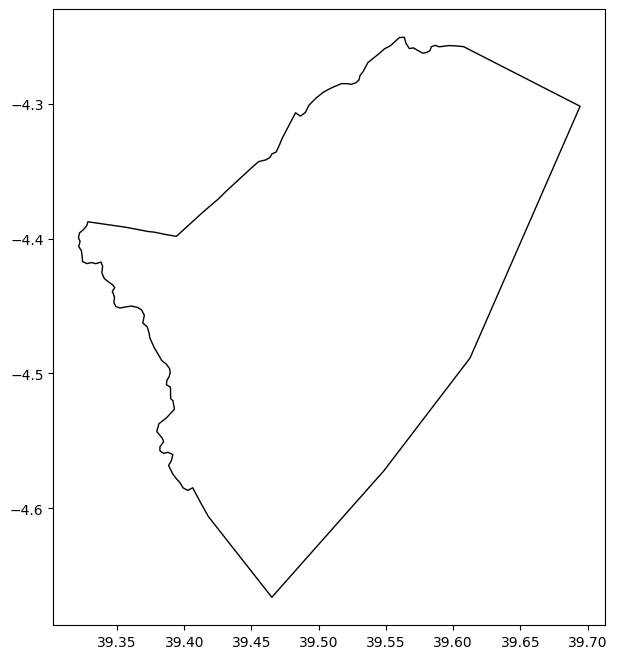

In [32]:
# Define function to plot constituencies
def plot_polygon_and_info(gdf, constituency_code):
    # Filter the GeoDataFrame based on the constituency code
    selected_polygon = gdf[gdf['constituency_code'] == constituency_code]

    if len(selected_polygon) == 0:
        print("No polygon found for the given constituency code.")
        return

    # Plot the selected polygon
    fig, ax = plt.subplots(figsize=(8, 8))
    selected_polygon.plot(ax=ax, facecolor='none', edgecolor='black')

    # Get shape area and length information
    county_name = selected_polygon['county_name'].iloc[0]
    constituency_name = selected_polygon['constituency_name'].iloc[0]
    shape_area = selected_polygon['shape_area'].iloc[0]
    shape_length = selected_polygon['shape_length'].iloc[0]

    # Display the shape area and length information
    print(f"County Name: {county_name}")
    print(f"Constituency Name: {constituency_name}")
    print(f"Shape Area: {shape_area}")
    print(f"Shape Length: {shape_length}")


    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Prompt the user to input a constituency code
    user_constituency_code = float(input("Enter the constituency code: "))

    # Call the function to plot the polygon and display the info
    plot_polygon_and_info(gdf, user_constituency_code)


### **Create a SQL Lite Database and Update table with shapefile data**

In [21]:
# Geodatafrae info
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   objectid           290 non-null    int64   
 1   county_name        290 non-null    object  
 2   constituency_code  290 non-null    float64 
 3   constituency_name  290 non-null    object  
 4   county_cod         290 non-null    float64 
 5   shape_length       290 non-null    float64 
 6   shape_area         290 non-null    float64 
 7   geometry           290 non-null    geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 20.4+ KB


In [25]:
# Connect to SQLite Database
database_name = "constituencies.db"
conn = sqlite3.connect(database_name)

In [27]:
# convert Geodataframe to a SQLite table
table = "constituencies"
gdf.to_sql(table, conn, if_exists='replace', index=False)

InterfaceError: Error binding parameter 7 - probably unsupported type.

In [ ]:
# commit and close connection
connection.commit()
connection.close()
